In [1]:
import scanpy as sc
import bbtnn

In [2]:
adata = sc.read("/Users/lsimon/OneDrive/Miko/UTHealth/projects/BatchBalancedTriplets/data/embl_all_merged.h5ad")

In [3]:
sc.pp.subsample(adata, n_obs = 10000)

In [4]:
adata

AnnData object with n_obs × n_vars = 10000 × 3001 
    obs: 'Assay', 'Factor Value Ontology Term[age]', 'Factor Value Ontology Term[biopsy site]', 'Factor Value Ontology Term[cell subtype]', 'Factor Value Ontology Term[cell type]', 'Factor Value Ontology Term[clinical information]', 'Factor Value Ontology Term[compound]', 'Factor Value Ontology Term[developmental stage]', 'Factor Value Ontology Term[disease]', 'Factor Value Ontology Term[dose]', 'Factor Value Ontology Term[ethnic group]', 'Factor Value Ontology Term[facs marker]', 'Factor Value Ontology Term[fraction]', 'Factor Value Ontology Term[genotype]', 'Factor Value Ontology Term[growth condition]', 'Factor Value Ontology Term[individual]', 'Factor Value Ontology Term[inferred cell type]', 'Factor Value Ontology Term[organism part]', 'Factor Value Ontology Term[phenotype]', 'Factor Value Ontology Term[replicate]', 'Factor Value Ontology Term[sampling site]', 'Factor Value Ontology Term[sampling time point]', 'Factor Value Ontolo

In [4]:
from bbtnn import tnn

In [5]:
%%time
model = tnn.TNN(k = 50, batch_size = 64, n_epochs_without_progress = 2, verbose = 2)
model.fit(X = adata, Y = None)
embedding = model.transform(X = adata)

[[0.00000000e+00 4.13761041e-02 1.31004367e-02 1.33858268e-01
  8.85826772e-03 1.84678523e-02 5.44291339e-01 1.67322835e-02
  5.51181102e-02 1.00393701e-01 0.00000000e+00 9.84251969e-03
  0.00000000e+00 0.00000000e+00 1.96850394e-03 1.96850394e-02
  0.00000000e+00 0.00000000e+00 6.88976378e-02 9.72222222e-02
  3.93700787e-03 9.84251969e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.28820961e-02 5.77034045e-04
  6.07624361e-01 0.00000000e+00 1.48809524e-03 0.00000000e+00
  5.43933054e-02 2.25000000e-02 0.00000000e+00 1.85960019e-03
  9.29800093e-04 0.00000000e+00 0.00000000e+00 1.57232704e-03
  4.50953045e-02 0.00000000e+00 4.19815281e-03 9.79938272e-02
  0.00000000e+00 9.29800093e-04 1.39470014e-03 6.04370060e-03
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.73362445e-03
  5.93886463e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.90705609e-02 2.96250000e-01 0.00000000e+00 2.35807860e-02
  8.73362445e-04 0.00000000e+00 0.

  0.00000000e+00]]
220369
******Batches:[0, 1, 2, 3, 4, ..., 20, 21, 22, 23, 24]
Length: 25
Categories (25, object): [0, 1, 2, 3, ..., 21, 22, 23, 24]
******Total number of cells:358704
******Number of cells for MNN:138335


W0316 15:15:56.833385 12324 deprecation.py:323] From C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4075: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0316 15:15:56.974904 12324 deprecation.py:506] From C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Training neural network
Epoch 1/1000
5605/5605 - 37s - loss: 0.1739
Epoch 2/1000
5605/5605 - 34s - loss: 0.0961
Epoch 3/1000
5605/5605 - 35s - loss: 0.0848
Epoch 4/1000
5605/5605 - 34s - loss: 0.0802
Epoch 5/1000
5605/5605 - 34s - loss: 0.0767
Epoch 6/1000
5605/5605 - 34s - loss: 0.0736
Epoch 7/1000
5605/5605 - 34s - loss: 0.0724
Epoch 8/1000
5605/5605 - 35s - loss: 0.0711
Epoch 9/1000
5605/5605 - 34s - loss: 0.0692
Epoch 10/1000
5605/5605 - 34s - loss: 0.0672
Epoch 11/1000
5605/5605 - 35s - loss: 0.0683
Epoch 12/1000
5605/5605 - 34s - loss: 0.0677
358704/358704 - 10s
Wall time: 1h 26min 21s


In [6]:
adata.obsm["X_umap"] = embedding

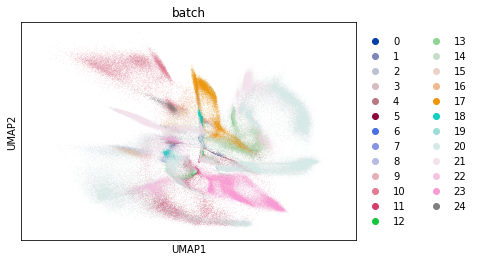

In [7]:
sc.pl.umap(adata, color = "batch")

In [1]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1, min_samples=50).fit(embedding)
adata.obs["cluster"] = clustering.labels_.astype("str")

NameError: name 'embedding' is not defined

In [ ]:
sc.pl.umap(adata, col = "cluster")